# Controller for the locking of the laser

In [13]:
%load_ext autoreload
%autoreload 2

from GettingStarted_lib.Interface import Interface
from GettingStarted_lib.LaserLockingController import LaserLockingController
import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating the interface:

It contains everything is needed for the comunications with the linien server in the RedPitaya.
- connection to the board;
- Initialization of the parameters;
- Parameters modification.

In [14]:
RP_Interface = Interface()
RP_Locking_Controller = LaserLockingController(RP_Interface)

2026-01-21 14:50:02 - Interface - INFO - Configuration loaded from /home/bec3/Desktop/Simone_Damian/Serafini/GettingStarted_lib/connect_config.yaml:

2026-01-21 14:50:02 - Interface - INFO - Attempting connection via RedPitaya_K address (192.168.1.159:18862)


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       ERROR    Server is not running. Launching it!


2.1.0


linien_client.deploy           DEBUG    Sending credentials
linien_client.deploy           DEBUG    Starting server


linien_server.cli              DEBUG    Copied linien-server.service to /etc/systemd/system
linien_server.cli              INFO     Starting Linien server
linien_server.cli              INFO     Started Linien server


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still

2026-01-21 14:50:32 - Interface - INFO - Connected to device via RedPitaya_K address
2026-01-21 14:50:33 - DataHandler - INFO - All reference lines loaded successfully.
2026-01-21 14:50:33 - LaserLockingController - INFO - LaserLockController initialized successfully.


In [59]:
pprint.pprint(vars(RP_Interface))

RP_Interface.client.parameters.check_for_changed_parameters()
params = RP_Interface.client.parameters
for name, param in vars(params).items():
    # Only pick those attributes that are actual Linien parameters
    if hasattr(param, "value"):
        print(f"{name}: {param.value}")

{'DEVICES': {'RedPitaya_K': {'ip': '192.168.1.159',
                             'linien_port': 18862,
                             'ssh_port': 22}},
 'PASSWORD': 'root',
 'USERNAME': 'root',
 'client': <linien_client.connection.LinienClient object at 0x7078b400df30>,
 'device': Device(key='dhmtcalcvf',
                  name='',
                  host='192.168.1.159',
                  port=18862,
                  username='root',
                  password='root',
                  parameters={}),
 'logger': <Logger Interface (INFO)>,
 'readable_params': {'control_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffea40>,
                     'monitor_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffc1f0>,
                     'sweep_signal': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffdc00>},
 'writeable_params': {'big_offset': <GettingStarted_lib.Interface.WriteableParameter object at 0x70

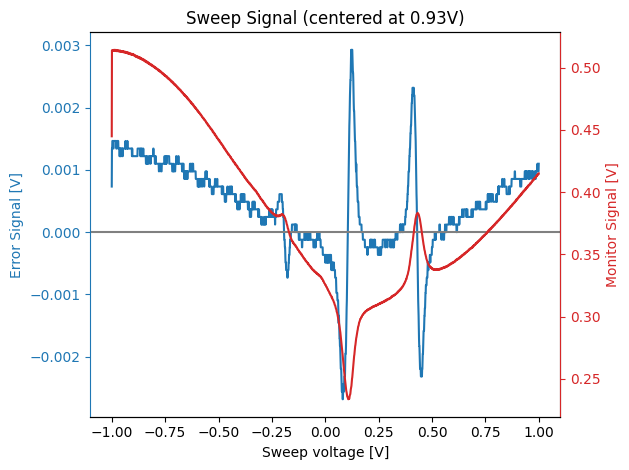

In [21]:
RP_Interface.plot_sweep()

In [19]:
RP_Interface.adjust_vertical_offset()

Actual offset_a: 0.0
New offset_a set to: -0.004


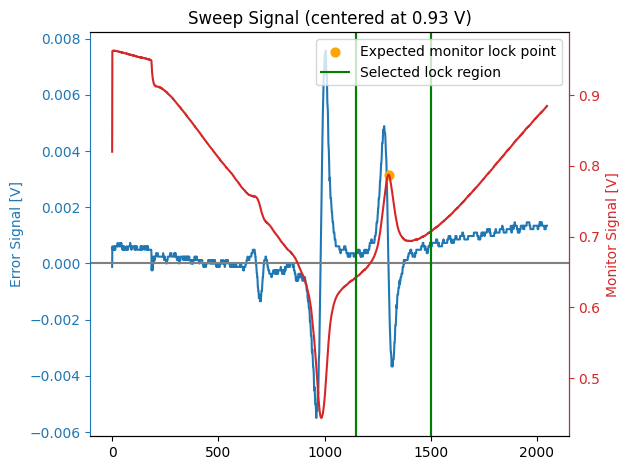

checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
Locking the laser worked! \o/
2025-12-15 15:57:58 - UnlockEventsLogger - INFO - Laser locked at time: 2025-12-15 15:57:58


In [72]:
RP_Interface.start_sweep()
RP_Locking_Controller.start_manual_locking()

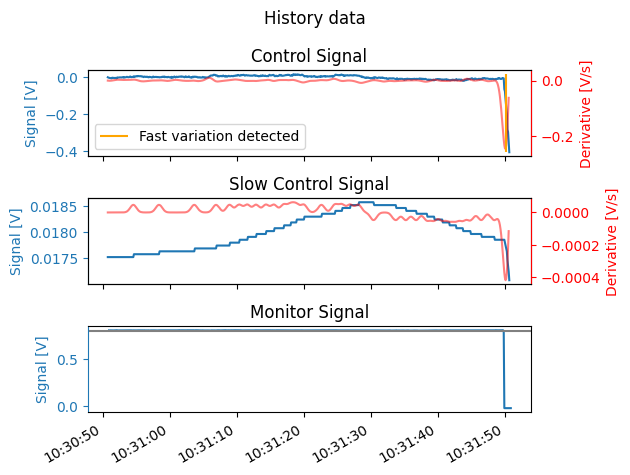

Laser lost locking
Trying to center the line looking at the slow control signal...


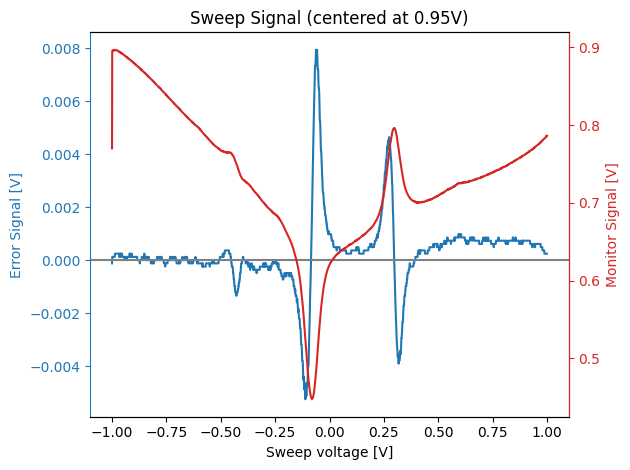

In [120]:
RP_Locking_Controller.start_locking_monitor()

In [213]:
RP_Interface.start_sweep()

2026-01-21 14:53:12 - LaserLockingController - INFO - Starting scan from 0.9V to 1.0V with 10 points.


Scanning at voltage 1.000V (10/10) [##########] (16.24s) Done!
2026-01-21 14:53:28 - LaserLockingController - INFO - Scan completed successfully.


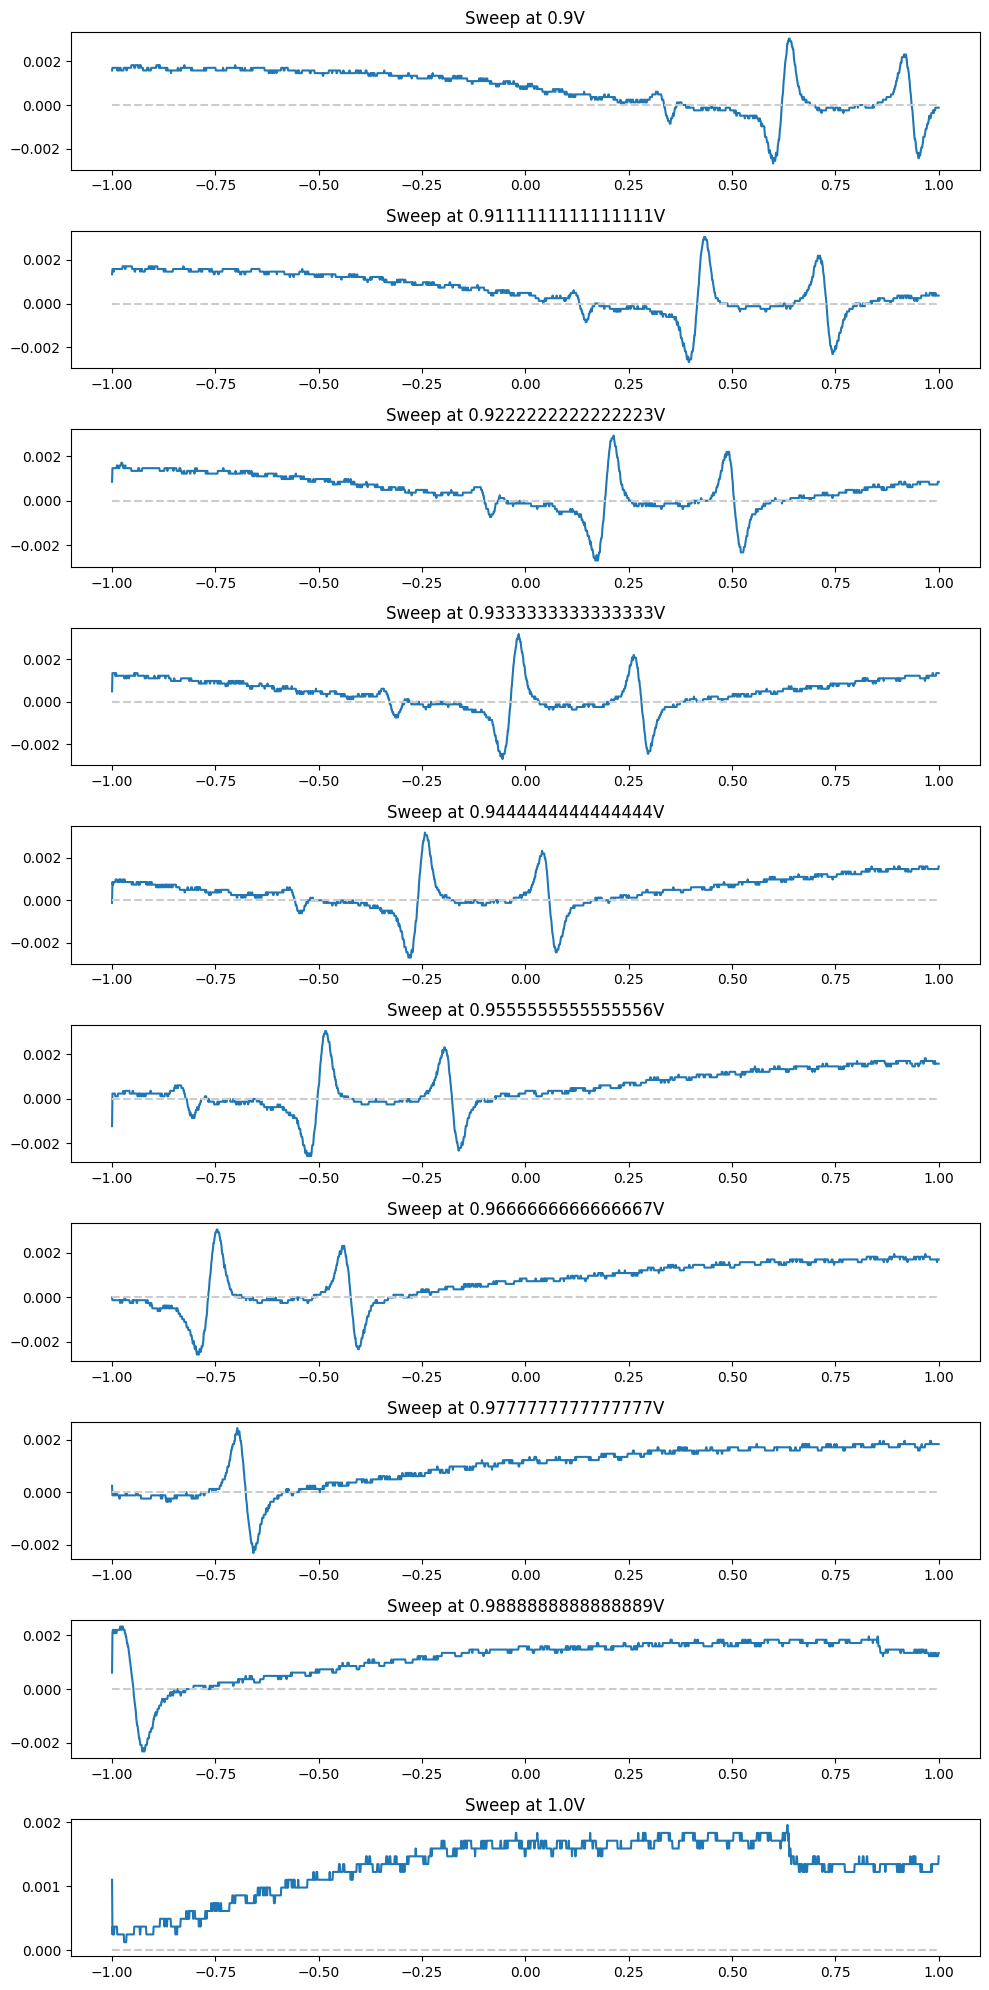

In [22]:
RP_Locking_Controller.scan(0.9, 1.0, 10)

2026-01-21 14:54:51 - LaserLockingController - INFO - Saving reference line with key K_D2.
2026-01-21 14:54:51 - DataHandler - INFO - Saved reference line: REFERENCE_LINE_K_D2.npy


2026-01-21 14:54:51 - DataHandler - INFO - All reference lines loaded successfully.


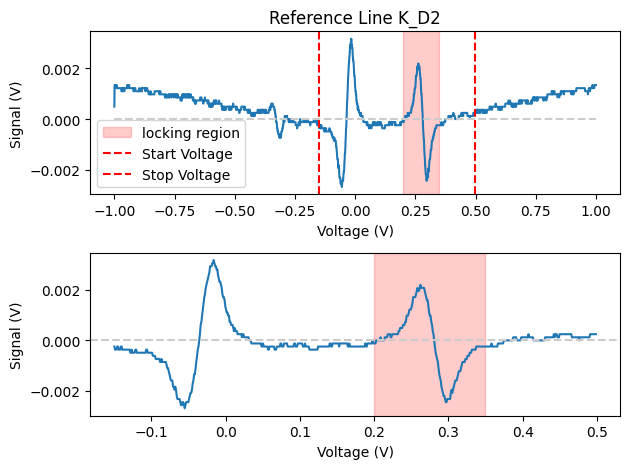

2026-01-21 14:54:51 - LaserLockingController - INFO - Reference line K_D2 saved successfully.


In [25]:
RP_Locking_Controller.save_reference_line(key = 'K_D2', V_scan = 0.933, start_voltage=-0.15, stop_voltage=0.5, V_lock_start = 0.2, V_lock_end = 0.35, offset=0)

2026-01-20 14:39:05 - LaserLockingController - INFO - Finding reference lines.


Scanning at voltage 1.000V (10/10) [##########] (17.24s) Done!
0.0


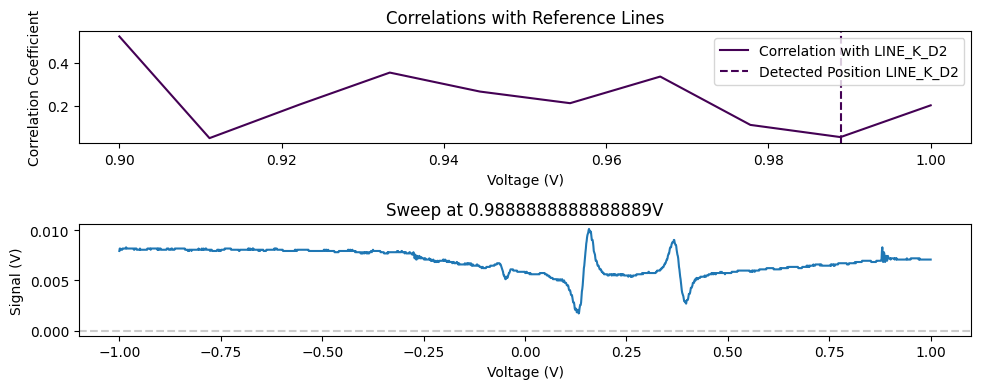

2026-01-20 14:39:23 - LaserLockingController - INFO - Reference lines found successfully.


In [90]:
RP_Locking_Controller.find_reference_lines(start_voltage = 0.9, stop_voltage = 1.0, num_points = 10)

In [204]:
RP_Interface.check_for_changed_parameters()
RP_Interface.get_remote_value('offset_a')

0.0

In [205]:
RP_Locking_Controller.set_debug_mode()

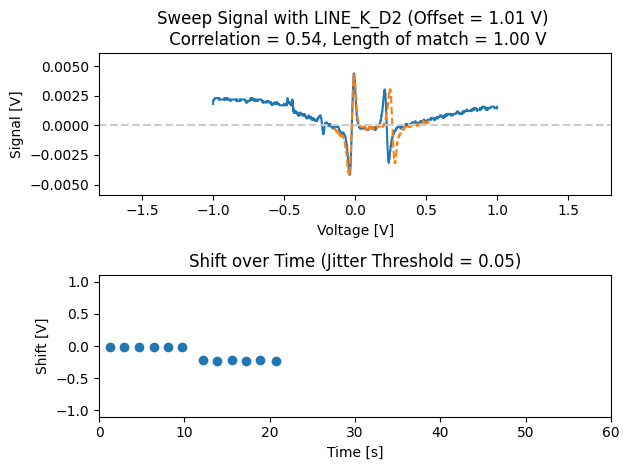

2026-01-20 10:12:19 - LaserLockingController - DEBUG - Frequency stable enough
2026-01-20 10:12:19 - LaserLockingController - INFO - Line LINE_K_D2 is centered at offset 1.01.
2026-01-20 10:12:19 - LaserLockingController - DEBUG - Starting autolock between indices 1197 and 1453.
2026-01-20 10:12:19 - LaserLockingController - DEBUG - First 10 values of sweep signal raw: [15. 17. 17. 18. 18. 18. 18. 18. 18. 18.]
Started autolock
checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
2026-01-20 10:12:30 - LaserLockingController - INFO - Locking the laser failed :(
2026-01-20 10:12:30 - LaserLockingController - INFO - Exiting centering and locking procedure.


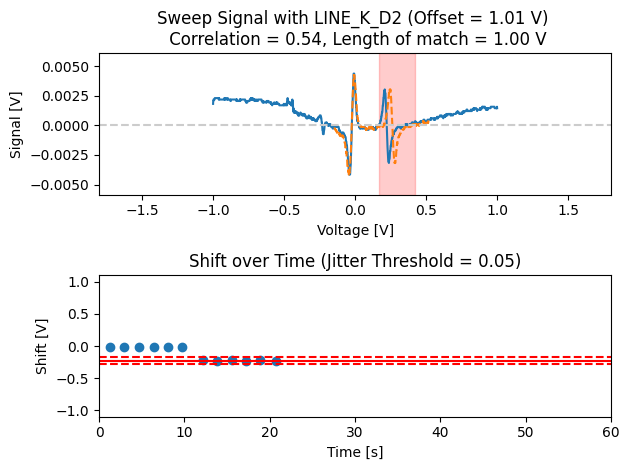

In [73]:
RP_Locking_Controller.center_and_lock_v1('LINE_K_D2')

In [83]:
RP_Locking_Controller.set_debug_mode()

In [215]:
RP_Locking_Controller.unset_debug_mode()

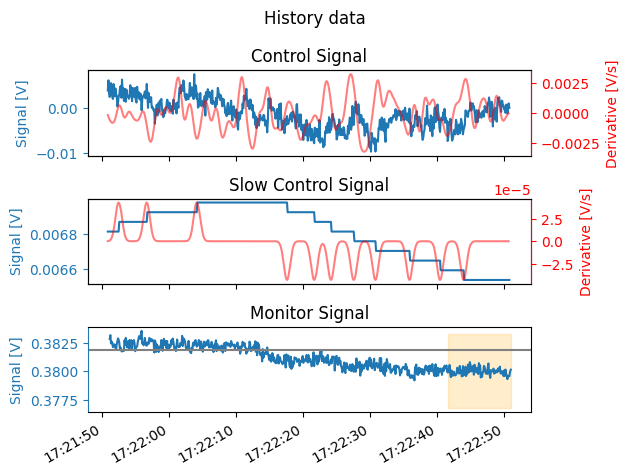

KeyboardInterrupt: 

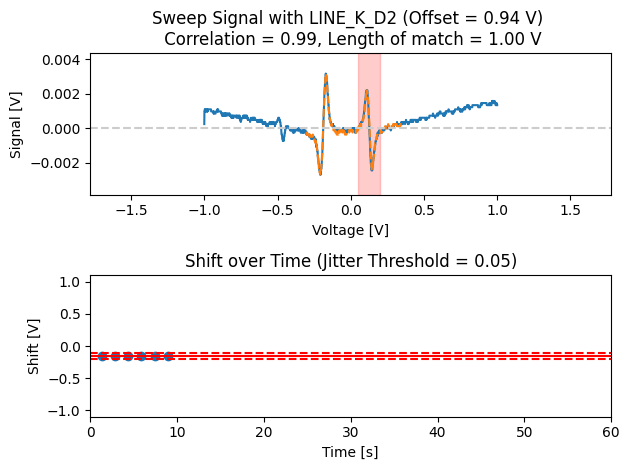

In [26]:
RP_Locking_Controller.automatic_lock_relock('LINE_K_D2')

In [27]:
RP_Interface.start_sweep()

## Analog out test

In [32]:
RP_Interface.check_for_changed_parameters()
RP_Interface.get_remote_value('offset_a')
RP_Interface.get_remote_value('big_offset')


0.0

In [17]:
RP_Interface.set_value('big_offset', 0.93)

In [109]:
RP_Interface.set_value('sweep_amplitude', 0.7)

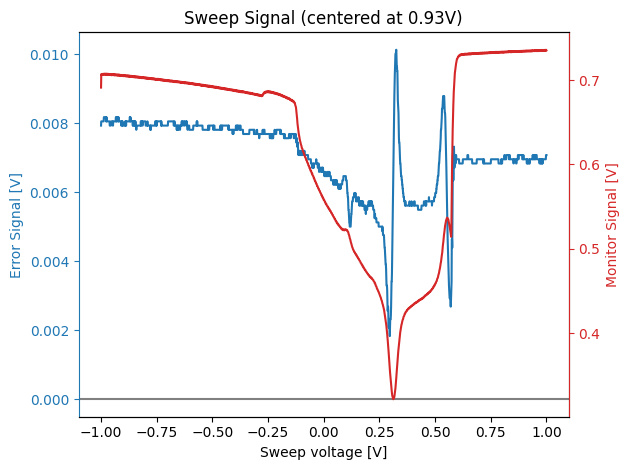

In [6]:
RP_Interface.plot_sweep()

# New architecture tests

In [ ]:
%load_ext autoreload
%autoreload 2

from GettingStarted_lib.Interface import Interface
from GettingStarted_lib.LaserLockingController import LaserLockingController
import pprint